In [3]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2

In [4]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [33]:


def cluster(path,nb_clusters,legend):
    # load the image and convert it from BGR to LAB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(path,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # show our image
    print(legend)
    plt.figure()
    plt.axis("off")
    plt.imshow(image)


    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = nb_clusters)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    print(hist)
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()



Trailer
[0.15502183 0.00655022 0.0720524  0.1069869  0.05021834 0.10043668
 0.09606987 0.18122271 0.22489083 0.00655022]


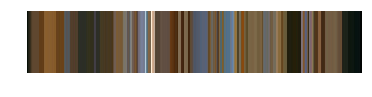

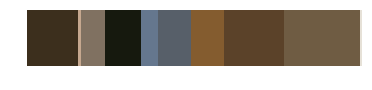

Movie
[0.1197408  0.04578541 0.10460296 0.07314498 0.12567704 0.06725622
 0.10688443 0.04758595 0.17575186 0.13357035]


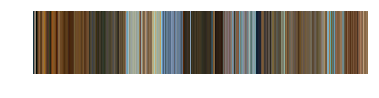

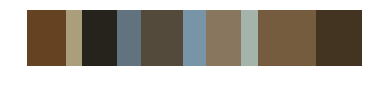

In [34]:
path_movie="./spectrumImages/spectrumImagesAsterix/7plagklTwWw.jpg"
path_trailer="./spectrumImages/spectrumImagesAsterix/DR1a7R5usts.jpg"
nb_clusters=10

cluster(path_trailer,nb_clusters,'Trailer')
cluster(path_movie,nb_clusters, 'Movie')